In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)


In [ ]:
df_train = pd.read_csv("numeric_train_data.csv")
df_test = pd.read_csv("numeric_test_data.csv")
df_train.head(5)
df_test.head(5)

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label
0,0.715236,0.693741,0.673291,0.675155,0.718251,0.703219,0.706388,0.757179,0.673783,0.617892,...,0.438356,0.592341,0.422709,0.600324,0.491890,0.654020,0.516087,0.745383,0.426049,0
1,0.638202,0.539125,0.413576,0.500710,0.633080,0.634422,0.585670,0.579234,0.597464,0.582047,...,0.351815,0.528008,0.416186,0.631978,0.522208,0.740917,0.466066,0.713554,0.401167,0
2,0.300166,0.289997,0.279196,0.318552,0.343168,0.292658,0.251033,0.396900,0.611866,0.711495,...,0.113269,0.463730,0.372439,0.567525,0.539345,0.616263,0.191980,0.342027,0.198181,1
3,0.697828,0.647420,0.581630,0.592989,0.683064,0.710182,0.698529,0.667966,0.691158,0.685162,...,0.419216,0.668173,0.503341,0.626000,0.538417,0.697739,0.478217,0.811338,0.518223,0
4,0.370128,0.508962,0.492916,0.391020,0.363103,0.367662,0.399747,0.469762,0.498174,0.399316,...,0.409716,0.630644,0.338582,0.540950,0.436101,0.765488,0.450831,0.634361,0.329778,1


In [3]:
df_train.groupby(by="label").count()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986,...,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986
1,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,...,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482


In [4]:
df_test.groupby(by="label").count()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497,...,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497
1,3121,3121,3121,3121,3121,3121,3121,3121,3121,3121,...,3121,3121,3121,3121,3121,3121,3121,3121,3121,3121


In [ ]:
df_train = df_train
df_test  = df_test
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


In [6]:
X_train.head()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
0,0.754849,0.779390,0.759366,0.751316,0.784726,0.768469,0.757818,0.774067,0.805796,0.799055,...,0.451511,0.622192,0.379673,0.765699,0.505795,0.768322,0.423743,0.715185,0.550899,0.683703
1,0.647823,0.660421,0.724216,0.714717,0.718076,0.619896,0.627704,0.697406,0.733271,0.643721,...,0.474462,0.259445,0.677306,0.313735,0.706081,0.294595,0.567451,0.414077,0.572985,0.337304
2,0.606633,0.678372,0.719577,0.642567,0.627117,0.633568,0.736226,0.865445,0.856939,0.810918,...,0.494851,0.421180,0.541674,0.505389,0.661754,0.641345,0.743680,0.450956,0.637368,0.429937
3,0.526641,0.416549,0.257526,0.403792,0.431129,0.407383,0.431240,0.438273,0.468717,0.466350,...,0.632163,0.102182,0.506463,0.341068,0.337560,0.258576,0.601660,0.284994,0.572166,0.372439
4,0.544110,0.460130,0.384042,0.454388,0.468227,0.505139,0.580514,0.658290,0.712323,0.649044,...,0.624875,0.350848,0.630898,0.506588,0.750737,0.582521,0.792226,0.498176,0.718858,0.481269


### RANDOM FOREST

In [7]:
feature_rf = [
    "chroma_2", "chroma_3", "chroma_4", "chroma_6", "chroma_7",
    "chroma_8", "chroma_9", "chroma_10", "chroma_11", "chroma_12",
    "rms_mean", "spectral_centroid_mean", "spectral_bandwidth_mean",
    "spectral_rolloff_mean", "zcr_mean",
    "mfcc_1", "mfcc_2", "mfcc_3", "mfcc_4", "mfcc_5", "mfcc_6",
    "mfcc_7", "mfcc_8", "mfcc_9", "mfcc_10", "mfcc_11", "mfcc_12",
    "mfcc_13", "mfcc_14", "mfcc_15", "mfcc_16", "mfcc_17", "mfcc_18",
    "mfcc_19", "mfcc_20"
]

X_train_rf = X_train[feature_rf]
X_test_rf = X_test[feature_rf]

Train Accuracy (RF): 98.88%


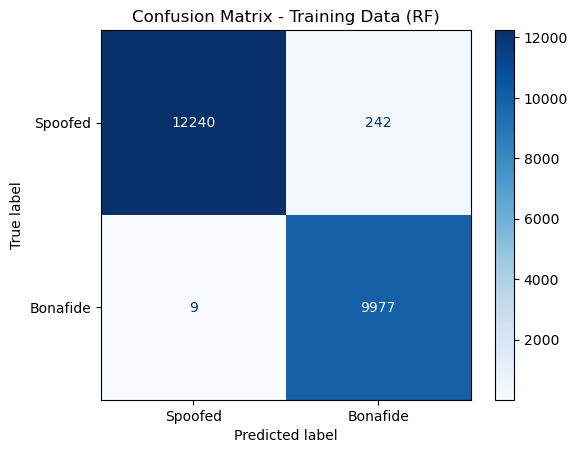

Test Accuracy (RF): 94.45%


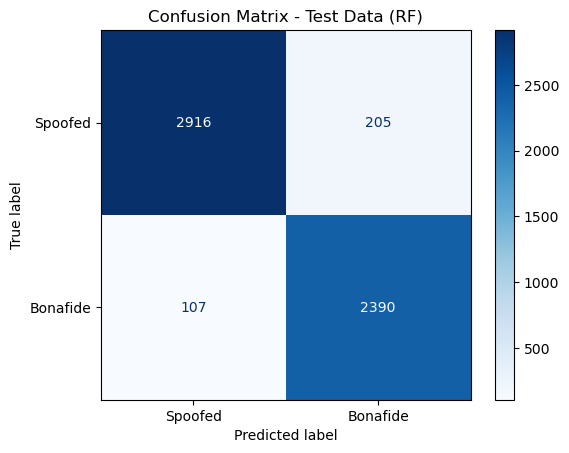

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=278,
    max_depth=18,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)


# Latih model pada data training
rf_model.fit(X_train_rf, y_train)

# ===== Evaluasi pada Data Training =====
y_pred_train_rf = rf_model.predict(X_train_rf)
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Train Accuracy (RF): {train_acc_rf * 100:.2f}%")

# ===== Evaluasi pada Data Test =====
y_pred_test_rf = rf_model.predict(X_test_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Test Accuracy (RF): {test_acc_rf * 100:.2f}%")



In [ ]:
# ===== METRIK EVALUASI TRAINING DATA =====
print("=== Classification Report - Training Data (RF) ===")
print(classification_report(y_train, y_pred_train_rf, target_names=["Bonafide", "Spoofed"], digits=4))

# ===== METRIK EVALUASI TEST DATA =====
print("=== Classification Report - Test Data (RF) ===")
print(classification_report(y_test, y_pred_test_rf, target_names=["Bonafide", "Spoofed"], digits=4))


=== Classification Report - Training Data (RF) ===
              precision    recall  f1-score   support

    Bonafide     0.9763    0.9991    0.9876      9986
     Spoofed     0.9993    0.9806    0.9899     12482

    accuracy                         0.9888     22468
   macro avg     0.9878    0.9899    0.9887     22468
weighted avg     0.9891    0.9888    0.9888     22468

=== Classification Report - Test Data (RF) ===
              precision    recall  f1-score   support

    Bonafide     0.9210    0.9571    0.9387      2497
     Spoofed     0.9646    0.9343    0.9492      3121

    accuracy                         0.9445      5618
   macro avg     0.9428    0.9457    0.9440      5618
weighted avg     0.9452    0.9445    0.9446      5618



In [ ]:
# import joblib

# # Simpan model ke file
# joblib.dump(rf_model, "28mei_rf_best_model.pkl")
# print("Model berhasil disimpan ke 'svm_best_model.pkl'")


Model berhasil disimpan ke 'svm_best_model.pkl'


### SVM

In [10]:
feature_svm = [
    "chroma_1", "chroma_2", "chroma_4", "chroma_9", "chroma_10", "chroma_11",
    "rms_mean", "spectral_centroid_mean", "spectral_bandwidth_mean",
    "spectral_rolloff_mean", "zcr_mean",
    "mfcc_1", "mfcc_2", "mfcc_3", "mfcc_4", "mfcc_5", "mfcc_6", "mfcc_7",
    "mfcc_9", "mfcc_11", "mfcc_12", "mfcc_13", "mfcc_14", "mfcc_15", "mfcc_18"
]

X_train_svm = X_train[feature_svm]
X_test_svm = X_test[feature_svm]

Train Accuracy (SVM): 97.98%


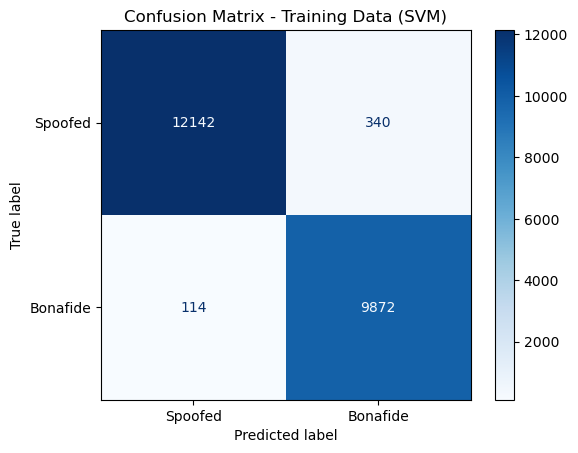

Test Accuracy (SVM): 96.67%


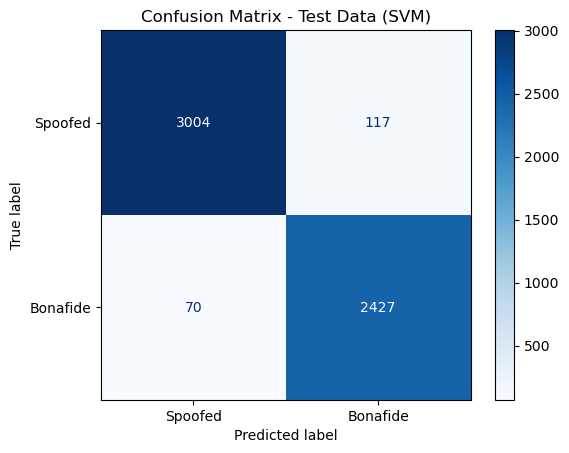

In [ ]:
# Inisialisasi model SVM dengan hyperparameter terbaik
svm_model = SVC(
    kernel='rbf',
    C=98.03363720445789,
    gamma=0.9926573491055003,
    random_state=42
)

# Latih model pada data training
svm_model.fit(X_train_svm, y_train)

# ===== Evaluasi pada Data Training =====
y_pred_train_svm = svm_model.predict(X_train_svm)
train_acc_svm = accuracy_score(y_train, y_pred_train_svm)
print(f"Train Accuracy (SVM): {train_acc_svm * 100:.2f}%")

cf_train_svm = confusion_matrix(y_train, y_pred_train_svm, labels=[1, 0])
ConfusionMatrixDisplay(cf_train_svm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Training Data (SVM)")
plt.show()

# ===== Evaluasi pada Data Test =====
y_pred_test_svm = svm_model.predict(X_test_svm)
test_acc_svm = accuracy_score(y_test, y_pred_test_svm)
print(f"Test Accuracy (SVM): {test_acc_svm * 100:.2f}%")

cf_test_svm = confusion_matrix(y_test, y_pred_test_svm, labels=[1, 0])
ConfusionMatrixDisplay(cf_test_svm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data (SVM)")
plt.show()


In [ ]:
# ===== METRIK EVALUASI TRAINING DATA (SVM) =====
print("=== Classification Report - Training Data (SVM) ===")
print(classification_report(y_train, y_pred_train_svm, target_names=["Bonafide", "Spoofed"], digits=4))

# ===== METRIK EVALUASI TEST DATA (SVM) =====
print("=== Classification Report - Test Data (SVM) ===")
print(classification_report(y_test, y_pred_test_svm, target_names=["Bonafide", "Spoofed"], digits=4))


=== Classification Report - Training Data (SVM) ===
              precision    recall  f1-score   support

    Bonafide     0.9667    0.9886    0.9775      9986
     Spoofed     0.9907    0.9728    0.9816     12482

    accuracy                         0.9798     22468
   macro avg     0.9787    0.9807    0.9796     22468
weighted avg     0.9800    0.9798    0.9798     22468

=== Classification Report - Test Data (SVM) ===
              precision    recall  f1-score   support

    Bonafide     0.9540    0.9720    0.9629      2497
     Spoofed     0.9772    0.9625    0.9698      3121

    accuracy                         0.9667      5618
   macro avg     0.9656    0.9672    0.9664      5618
weighted avg     0.9669    0.9667    0.9667      5618



In [ ]:
# import joblib

# # Simpan model ke file
# joblib.dump(svm_model, "28mei_svm_best_model.pkl")
# print("Model berhasil disimpan ke 'svm_best_model.pkl'")


Model berhasil disimpan ke 'svm_best_model.pkl'
